<a href="https://colab.research.google.com/github/RyanNewB/Assessment-2-Programming-Assignment-2/blob/main/Assignment_2_Business_Report_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

Exploring Australian Energy Data with Python

In this project, our group will delve into Australian energy data using Python in Google Colab notebooks. We’ll learn how to connect to databases, analyze data, create visualizations, and apply best practices in programming. Along the way, we’ll extract insights, collaborate effectively, apply statistical methods and machine learning techniques as needed and implement version control using GitHub to collaborate seamlessly.

Our task is to work with the provided dataset, extract insights, and present them visually. We’ll create informative charts and graphs to showcase energy-related trends.

**Setting up the environment:**

As part of our assignment, our group has prepared both Business and Development reports in Google Colab. Here’s what we’ve done:

Business Report:
We’ve created a comprehensive report that includes analysis, insights, and discussions.
This report is ready to run in Google Colab with no additional steps.

Development Notebook:
Our development notebook contains pseudocode, testing, and other industry best practices.
We’ve uploaded both notebooks to our Group’s GitHub account, along with the names and student IDs of our team members.

Libraries Used:
For this task, we’ve imported essential libraries: SQLite3, Pandas, and Matplotlib.


*import sqlite3*

*import pandas as pd*

*import matplotlib.pyplot as plt*

**Accessing the database:**

We have established the connection with the given SQLite3 database 'AUS_energy_sqlite3.db'

Here, we can start to inspect the dataset from the 'AUS_energy_sqlite3.db'.


See code below:

In [11]:
import sqlite3
connection = sqlite3.connect('/content/AUS_energy_sqlite3.db')
cursor = connection.cursor()

In [12]:

sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

First line is to import the SQLite module.

Second line is establishes a connection to an SQLite database file named 'AUS_energy_sqlite3.db'.

And the Third line is to create an cursor object to execute SQL queries and fetch results from the database.

The code establishes a connection to an SQLite database (AUS_energy_sqlite3.db) as given for this task and prepares a cursor  object for executing SQL queries for data inspection.

In [14]:
sql='''
PRAGMA table_info('AUS_energy');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'Year', 'TEXT', 0, None, 0),
 (1, 'State', 'TEXT', 0, None, 0),
 (2, 'Coal (PJ)', 'REAL', 0, None, 0),
 (3, 'Oil (PJ)', 'REAL', 0, None, 0),
 (4, 'Gas (PJ)', 'REAL', 0, None, 0),
 (5, 'Renewables (PJ)', 'REAL', 0, None, 0),
 (6, 'Population', 'INTEGER', 0, None, 0),
 (7, 'GSP ($ million)', 'INTEGER', 0, None, 0)]

SQL Query:

The SQL query above retrieves the names of the tables in an SQLite database.
It looks for tables within the database by querying the sqlite_master table.
Specifically, it selects the name column from the sqlite_master table where the type is 'table'.

The cursor.execute(sql) line executes the SQL query.
The result of the query is fetched using cursor.fetchall(), which returns a list of table names.

In [16]:
import pandas as pd

sql='''
SELECT * from AUS_energy;
'''
# Load the data into a DataFrame
AUS_energy_df = pd.read_sql_query(sql, connection)

SQL Query:

(PRAGMA table_info()):

The provided SQL query uses the PRAGMA table_info() statement.
It retrieves information about the columns (fields) within the table named 'AUS_energy'. Execute and fetchall for executing the query and getting the result corresponds to a column in the table.

**Data extraction and manipulation:**

Exploring the structure of the dataset.

Displaying the first few rows of the dataset using head().

Using info() to get information about the data types and missing values.

Using describe() to get summary statistics for numerical columns (if any).

In [17]:
AUS_energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


Result: By using the codes above, it showed that the dataset is incomplete with the Northern Territory (NT) state has no information or record on Coal.

In [18]:
AUS_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [19]:
AUS_energy_df.describe()

,Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


Checking dupilcates:

In [23]:
AUS_energy_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

In [25]:
duplicates = AUS_energy_df[AUS_energy_df.duplicated()]
duplicates

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)


Checking null values:

In [26]:
AUS_energy_df.isnull().head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


Result: No duplicate/s found in the the dataset.

**Data Analysis:**

In [27]:
AUS_energy_df[['State', 'GSP ($ million)']]

,State,GSP ($ million)
0,WA,244695
1,NSW,530532
2,VIC,368579
3,QLD,284526
4,SA,100174
...,...,...
93,VIC,500900
94,QLD,384508
95,SA,124252
96,TAS,36701


In [31]:
AUS_energy_df[['State', 'Population']]

,State,Population
0,WA,2240250
1,NSW,7408540
2,VIC,5371934
3,QLD,4328771
4,SA,1608902
...,...,...
93,VIC,6625964
94,QLD,5320496
95,SA,1821200
96,TAS,571013


In [29]:
import pandas as pd

# Group the data by Total Population in every state
grouped_data = AUS_energy_df.groupby(['State','Year', 'Population'])

# Calculate the count for each group
Total_state_population_counts = grouped_data.size()
Total_state_population_counts

State  Year     Population
NSW    2008-09  7408540       1
       2009-10  7506058       1
       2010-11  7586514       1
       2011-12  7680783       1
       2012-13  7787289       1
                             ..
WA     2017-18  2617792       1
       2018-19  2659625       1
       2019-20  2712912       1
       2020-21  2749365       1
       2021-22  2789148       1
Length: 98, dtype: int64

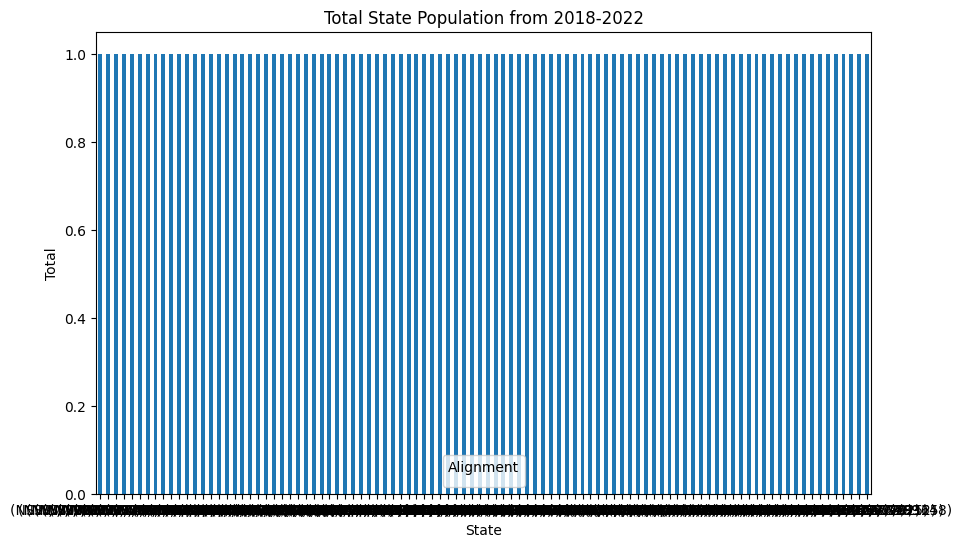

In [30]:
# Create a stacked bar chart
Total_state_population_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total State Population from 2018-2022')
plt.xlabel('State')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.legend(title='Alignment')

# Display the plot
plt.show()

**Weizhe's part:**

 - **Limitations of analysis and suggest possible improvements:**

Data integrity and processing limitation: There are no clear steps for handling missing or outliers. If there are missing or outliers in the data, the results of the analysis may be affected. COALESCE is used in SQL queries to handle missing values, but in subsequent data processing and visualization, these missing values are not further checked and processed.

Suggestions for Improvement: After reading the data, check and process missing values and outliers. For example, use df.isnull().sum() to check the number of missing values in each column and use an appropriate method (such as fill, delete or replace) to handle the missing values. Before visualization, data is cleaned and standardized to ensure accuracy and interpretability of charts.

Visualization limitation: Visual diagrams are basic and may not convey complex information clearly. The lack of chart annotations and labels may affect the reader's understanding of the data.

Suggestions for Improvement: Enhance the visualization of the chart, such as adding data labels, annotations, trend lines, etc., to improve the readability and information content of the chart. Use richer chart types (such as stacked bar charts, scatter plots, box plots, etc.) to display data relationships and distributions in different dimensions.

Database connection and query efficiency limitation: The code re-executes the SQL query every time, which may affect performance if the amount of data is large. Not using indexes or optimizing queries, which can result in slower queries.

Suggestions for Improvement: Create indexes in the database to optimize query performance. After the initial query, store the data locally (such as CSV file or pandas DataFrame) to avoid repeated queries and improve processing speed. Use connection pools or persistent connections to improve the efficiency and stability of database connections.

We can get better in Python and make less mistakes by concentrating on frequent mistakes, debugging, documentation, practice, version control, code readability, and learning from mistakes. Slow performance, wasteful SQL queries, crowded visualisations, and poor data quality are some of the shortcomings of the investigation. comprehensive data cleansing, effective processing, error management, and detail records are some of the improvements.

- **Usability and effectiveness of Python notebooks as Report.**

Python notebooks are very effective in data analysis and reporting. They allow for interactive and dynamic exploration of data. The notebooks integrate code, visualization, and text, making it easy to record and present findings.

Effectiveness: Notebooks support achieving reproducibility by combining code and results in a single document. They are particularly well suited for collaboration as they can be shared and edited by multiple users.

However, it’s important to note that while Python notebooks enhance comprehension and troubleshooting, challenges may arise with version control and scalability for large datasets and complex analyses.

- **Reflection on the use of Gen AI in aiding in problem solving and data analysis.**

Advantage: Generative AI can help automate data preprocessing, recognize patterns and generate insights from big data sets. It can provide recommendations and code snippets to speed up the analysis process.

Validity: Generative AI can help generate hypotheses and perform exploratory data analysis, providing new perspectives that may have been overlooked. It is particularly useful for repetitive tasks, allowing analysts to focus on more complex problem-solving activities.

Limitations: AI-generated insights are dependent on the quality of the input data and the context provided. Incorrect or incomplete inputs can lead to misleading conclusions.

Gen AI greatly facilitates problem-solving and data analysis. By swiftly analysing big datasets, finding patterns, and forecasting trends, it improves efficiency. Natural language processing and advanced analytics provided by Gen AI facilitate decision-making by facilitating easier access to complex data.

In summary, Generative AI enhances problem-solving and data analysis by swiftly analyzing big datasets, identifying patterns, and forecasting trends. Its natural language processing and advanced analytics capabilities facilitate decision-making by providing easier access to complex data.

**Conclusion:**

As a team, our goal is to complete this assessment applying the knowledge and techniques we have learnt from the lectures and laboratory sessions thoughout the semester. We tried based on our capacity and know-how, using other methods and references that is available. We have encounter numerous issues, errors and short comings along the way. As a group, we saw the effectiveness, complexity and challenges in data analysis, Python programming and in collaborating with ideas and results. This assessment is a collective effort with the help of Gen-AI tool to give us options on how to develop, fix and show us the right approach in problem solving. It also helped us broaden our ideas in completing this assessment.

**Issues encountered:**

Database connection issues.

Problem: Unable to connect to the SQLite database.

Insight: Ensure the database file path is correct and the file has the appropriate permissions. Use context managers (with statements) to handle connections properly.

Solution:

In [ ]:
sqlite3.connect('database.db') as conn:

SyntaxError: invalid syntax (<ipython-input-1-8911b7083757>, line 1)

Problem: SQL queries fail due to syntax errors.

Insight: Review SQL syntax carefully. Use multiline strings for complex queries to improve readability.

Solution:

In [ ]:
query = """
SELECT *
FROM table_name
WHERE condition;
"""
cursor.execute(query)


Data integrity issues.

Problem: Inconsistent or corrupted data.

Insight: Use transactions to ensure data integrity. Always commit or rollback transactions as needed.

Solution:

In [ ]:
try:
    cursor.execute(query)
    conn.commit()
except sqlite3.Error as e:
    conn.rollback()
    print(f"An error occurred: {e}")

Matplotlib.

Large Data Visualization:

Problem: Plotting large datasets makes the plot unreadable.

Insight: Downsample the data or use aggregation techniques to make the plot more readable.

Solution:

In [ ]:
df_sampled = df.sample(frac=0.1)  # Take a 10% sample of the data
plt.plot(df_sampled['x_column'], df_sampled['y_column'])
plt.show()


Understanding common errors (such as syntax errors, type errors, and value errors) and how to troubleshoot them can significantly improve coding efficiency. Familiarizing with error messages and stack traces. Hence I developed debuggig skills with the help of GEN AI.